<a href="https://colab.research.google.com/github/harithaselvakumaran/Deep-Learning/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
Y_train = Y_train.reshape(-1)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [28]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [29]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index]) #or imshow
  plt.xlabel(classes[Y[index]])

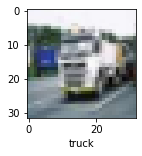

In [9]:
plot_sample(X_train,Y_train,1000)

In [10]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [11]:
ann_model = keras.Sequential([
              keras.layers.Flatten(input_shape=(32,32,3)),
              keras.layers.Dense(3000, activation='relu'),
              keras.layers.Dense(1000, activation='relu'),
              keras.layers.Dense(10, activation='sigmoid')
])

ann_model.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.fit(X_train,Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 12s 6ms/step - loss: 1.8089 - accuracy: 0.3556
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6216 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5392 - accuracy: 0.4583
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4818 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4316 - accuracy: 0.4955


In [12]:
ann_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5369 - accuracy: 0.4546


[1.5368854999542236, 0.4546000063419342]

In [13]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = ann_model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      1000
           1       0.48      0.74      0.58      1000
           2       0.40      0.29      0.34      1000
           3       0.36      0.32      0.34      1000
           4       0.32      0.53      0.40      1000
           5       0.52      0.17      0.26      1000
           6       0.69      0.16      0.27      1000
           7       0.36      0.75      0.49      1000
           8       0.63      0.60      0.62      1000
           9       0.62      0.43      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



### Using CNN

In [14]:
cnn_model = keras.Sequential([
                  #cnn
                  keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                  keras.layers.MaxPooling2D((2,2)),

                  keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                  keras.layers.MaxPooling2D((2,2)),

                  #dense
                  keras.layers.Flatten(),
                  keras.layers.Dense(64, activation='relu'),
                  keras.layers.Dense(10, activation='softmax')
])

In [15]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [17]:
cnn_model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5167 - accuracy: 0.4536
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2309 - accuracy: 0.5654
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1118 - accuracy: 0.6108
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0478 - accuracy: 0.6339
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9953 - accuracy: 0.6514
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9602 - accuracy: 0.6658
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9263 - accuracy: 0.6783
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8967 - accuracy: 0.6895
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8683 - accuracy: 0.6985
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.847

In [18]:
cnn_model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9928 - accuracy: 0.6634


[0.9927929639816284, 0.6633999943733215]

In [19]:
Y_test = Y_test.reshape(-1)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

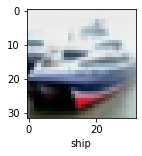

In [20]:
plot_sample(X_test, Y_test,1)

In [24]:
y_pred = cnn_model.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[3, 8, 8, 0, 6]

In [25]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

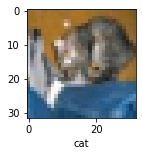

In [30]:
plot_sample(X_test, Y_test, 0)

In [32]:
classes[y_pred[0]]

'cat'

In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.83      0.74      0.79      1000
           2       0.56      0.56      0.56      1000
           3       0.49      0.47      0.48      1000
           4       0.55      0.67      0.61      1000
           5       0.64      0.48      0.55      1000
           6       0.85      0.61      0.71      1000
           7       0.65      0.75      0.70      1000
           8       0.76      0.81      0.78      1000
           9       0.67      0.81      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

